# Data wrangling

You know the basics. What are Jupyter notebooks, how do they work, and
how do you run Python in them. It is time to start using them for data
science (no, that simple math you did the last time doesn’t count as
data science).

You are about to enter the PyData ecosystem. It means that you will
start learning how to work with Python from the middle. This course does
not explicitly cover the fundamentals of programming. It is expected
that those parts you need you’ll be able to pick as you go through the
specialised data science stack. If you’re stuck, confused or need
further explanation, use Google (or your favourite search engine), ask
AI to explain the code or ask on Discord or during the class. Not
everything will be told during the course (by design), and the internet
is a friend of every programmer, so let’s figure out how to use it
efficiently from the beginning.

Let’s dig in!

## Munging and wrangling

Real-world datasets are messy. There is no way around it: datasets have
“holes” (missing data), the amount of formats in which data can be
stored is endless, and the best structure to share data is not always
the optimum to analyse them, hence the need to
[munge](http://dictionary.reference.com/browse/munge)[1] them. As has
been correctly pointed out in many outlets, much of the time spent in
what is called Data Science is related not only to sophisticated
modelling and insight but has to do with much more basic and less exotic
tasks such as obtaining data, processing, and turning them into a shape
that makes analysis possible, and exploring it to get to know their
basic properties.

Surprisingly, very little has been published on patterns, techniques,
and best practices for quick and efficient data cleaning, manipulation,
and transformation because of how labour-intensive and relevant this
aspect is. In this session, you will use a few real-world datasets and
learn how to process them into Python so they can be transformed and
manipulated, if necessary, and analysed. For this, you will introduce
some of the bread and butter of data analysis and scientific computing
in Python. These are fundamental tools that are constantly used in
almost any task relating to data analysis.

This notebook covers the basics and the content that is expected to be
learnt by every student. You use a prepared dataset that saves us much
of the more intricate processing that goes beyond the introductory level
the session is aimed at. If you are interested in how it was done, there
is a
[notebook](https://github.com/martinfleis/sds/blob/main/data/chicago_influenza_1918/preprocessing.ipynb).

This notebook discusses several patterns to clean and structure data
properly, including tidying, subsetting, and aggregating. You finish
with some basic visualisation. An additional extension presents more
advanced tricks to manipulate tabular data.


## Dataset

You will be exploring demographic characteristics of Madrid. The data has been aggregated to a neighbourhood level by the statistic's office of Madrid's City Hall. It contains information per year (from 2018 to 2023) and genre.

As with many datasets that will be used during this course, the data was originally gound in the data portal on the [following link](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=0cccaebc07c1f710VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)

The main tool you should use for this task is the `pandas` package. As with the `math` you used [before](../chapter_1_jupyter/notebooks_and_python.ipynb), you must import it first.

[1] Data munging and data wrangling are used interchangeably. Pick the
one you like.


In [1]:
import pandas as pd

The data is stored in a CSV file. To make things easier, you can read
data from a file posted online so, for now, you do not need to download
any dataset:


In [2]:
madrid_pop = pd.read_csv(
    "https://datos.madrid.es/egob/catalogo/300557-0-poblacion-distrito-barrio.csv",
    sep=";",
)

> **Tip**
>
> You are using `read_csv` because the file you want to read is in CSV
> format. However, the current data is actually not separated by _commas_ `,`
> but with a semicolon `;`, hence the additional parameter in the code.
>
> Note that `pandas` allows for many more formats to be read and
> write. A full list of formats supported may be found in [the
> documentation](https://pandas.pydata.org/docs/user_guide/io.html).

> **Alternative**
>
> Instead of reading the file directly off the web, it is possible to
> download it manually, store it on your computer, and read it locally.
> To do that, you can follow these steps:
>
> 1.  Download the file by clicking on [this
>     link](https://datos.madrid.es/egob/catalogo/300557-0-poblacion-distrito-barrio.csv)
>     and saving the file
> 2.  Place the file in the same folder as the notebook where you intend
>     to read it
> 3.  Replace the code in the cell above with:
>
> ```python
> madrid_pop = pd.read_csv(
>     "poblacion_1_enero.csv",
>     sep=";",
>     index_col="distrito",
> )
> ```

## Pandas 101

Now, you are ready to start playing and interrogating the dataset! What
you have at your fingertips is a table summarising, for each of the districts in Madrid, how many people lived there by genre. These tables are called `DataFrame` objects, and
they have a lot of functionality built-in to explore and manipulate the
data they contain. Let’s explore a few of those cool tricks!

### Data Structures

The first aspect worth spending a bit of time on is the structure of a
`DataFrame`. You can print it by simply typing its name:


In [3]:
madrid_pop

,fecha,cod_municipio,municipio,cod_distrito,distrito,cod_barrio,barrio,num_personas,num_personas_hombres,num_personas_mujeres
0,1 de enero de 2023,28079,Madrid,1,Centro,1,Centro,139.687,70.770,68.917
1,1 de enero de 2023,28079,Madrid,2,Arganzuela,2,Arganzuela,153.304,71.754,81.550
2,1 de enero de 2023,28079,Madrid,3,Retiro,3,Retiro,117.918,53.458,64.460
3,1 de enero de 2023,28079,Madrid,4,Salamanca,4,Salamanca,145.702,64.452,81.250
4,1 de enero de 2023,28079,Madrid,5,Chamartín,5,Chamartín,144.796,65.245,79.551
...,...,...,...,...,...,...,...,...,...,...
913,1 de enero de 2018,28079,Madrid,21,Barajas,212,Aeropuerto,1.794,922,872
914,1 de enero de 2018,28079,Madrid,21,Barajas,213,CascoHistóricodeBarajas,7.336,3.550,3.786
915,1 de enero de 2018,28079,Madrid,21,Barajas,214,Timón,11.750,5.651,6.099
916,1 de enero de 2018,28079,Madrid,21,Barajas,215,Corralejos,7.510,3.657,3.853


As you can expect, the dataset was inputed in the original local languange so to make things a little easier, we are going to translate the column names using one list of texts.

> _Note that there are multiple ways of arriving at the same output, the below is just one of them_


In [4]:
en_cols = [
    "date",
    "code_municipality",
    "municipality",
    "code_district",
    "district",
    "code_neighbourhood",
    "neighbourhood",
    "num_people",
    "num_people_men",
    "num_people_women",
]

madrid_pop.columns = en_cols
madrid_pop

,date,code_municipality,municipality,code_district,district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women
0,1 de enero de 2023,28079,Madrid,1,Centro,1,Centro,139.687,70.770,68.917
1,1 de enero de 2023,28079,Madrid,2,Arganzuela,2,Arganzuela,153.304,71.754,81.550
2,1 de enero de 2023,28079,Madrid,3,Retiro,3,Retiro,117.918,53.458,64.460
3,1 de enero de 2023,28079,Madrid,4,Salamanca,4,Salamanca,145.702,64.452,81.250
4,1 de enero de 2023,28079,Madrid,5,Chamartín,5,Chamartín,144.796,65.245,79.551
...,...,...,...,...,...,...,...,...,...,...
913,1 de enero de 2018,28079,Madrid,21,Barajas,212,Aeropuerto,1.794,922,872
914,1 de enero de 2018,28079,Madrid,21,Barajas,213,CascoHistóricodeBarajas,7.336,3.550,3.786
915,1 de enero de 2018,28079,Madrid,21,Barajas,214,Timón,11.750,5.651,6.099
916,1 de enero de 2018,28079,Madrid,21,Barajas,215,Corralejos,7.510,3.657,3.853


Note the printing is cut to keep a nice and compact view but enough to
see its structure. Since they represent a table of data, `DataFrame`
objects have two dimensions: rows and columns. Each of these is
automatically assigned a name in what you will call its _index_. When
printing, the index of each dimension is rendered in bold, as opposed to
the standard rendering for the content. The example above shows how the
column index is automatically picked up from the `.csv` file’s column
names. For rows, we will specify `disctrict` to be used as the index.

> In our case, because we had not established the `index_col` from the loading of the file
> `pandas` automatically generates a sequence starting in `0` and
> going all the way to the number of rows minus one. This is the standard
> structure of a `DataFrame` object, so you will come to it over and over.
> Importantly, even when you move to spatial data, your datasets will have
> a similar structure.


In [5]:
# Remove leading and trailing spaces from 'distrito'
madrid_pop["district"] = madrid_pop["district"].str.strip()
madrid_pop.set_index("district", inplace=True)

One final feature that is worth mentioning about these tables is that
they can hold columns with different types of data. In this example, you
have counts (or `int` for integer types) and ratios (or ‘float’ for
floating point numbers - a number with decimals) for each column. But it
is useful to keep in mind that you can combine this with columns that
hold other types of data such as categories, text (`str`, for string),
dates or, as you will see later in the course, geographic features.

To extract a single column from this `DataFrame`, specify its name in
the square brackets (`[]`). Note that the name, in this case, is a
`string`. A piece of text. As such, it needs to be within single (`'`)
or double quotes (`"`). The resulting data structure is no longer a
`DataFrame`, but you have a `Series` because you deal with a single
column.


In [6]:
madrid_pop["num_people_women"]

district
Centro           68.917
Arganzuela       81.550
Retiro           64.460
Salamanca        81.250
Chamartín        79.551
                ...    
Barajas             872
Barajas           3.786
Barajas           6.099
Barajas           3.853
Todos         1.721.484
Name: num_people_women, Length: 918, dtype: object

### Inspect

Inspecting what it looks like. You can check the table’s top (or bottom)
X lines by passing X to the method `head` (`tail`). For example, for the
top/bottom five lines:


In [7]:
madrid_pop.head()

,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women
district,,,,,,,,,
Centro,1 de enero de 2023,28079,Madrid,1,1,Centro,139.687,70.770,68.917
Arganzuela,1 de enero de 2023,28079,Madrid,2,2,Arganzuela,153.304,71.754,81.550
Retiro,1 de enero de 2023,28079,Madrid,3,3,Retiro,117.918,53.458,64.460
Salamanca,1 de enero de 2023,28079,Madrid,4,4,Salamanca,145.702,64.452,81.250
Chamartín,1 de enero de 2023,28079,Madrid,5,5,Chamartín,144.796,65.245,79.551


In [8]:
madrid_pop.tail(3)

,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women
district,,,,,,,,,
Barajas,1 de enero de 2018,28079,Madrid,21,214,Timón,11.750,5.651,6.099
Barajas,1 de enero de 2018,28079,Madrid,21,215,Corralejos,7.510,3.657,3.853
Todos,1 de enero de 2018,28079,Madrid,Todos,Todos,Todos,3.221.824,1.500.340,1.721.484


Inspecting your datasets is vital to find errors that could skew your analysis.
As you can see, the last row of our dataset has been aggregated to consolidate the sum of all column values ( Spanish: _`Todos`_ -> English: _`All`_ ).

Before continuing, let's fix that.
First we are going to check if we have any more occurrences of _`Todos`_.


In [9]:
madrid_pop.loc["Todos"]

,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women
district,,,,,,,,,
Todos,1 de enero de 2023,28079,Madrid,Todos,Todos,Todos,3.339.931,1.559.866,1.780.065
Todos,1 de enero de 2022,28079,Madrid,Todos,Todos,Todos,3.286.662,1.534.824,1.751.838
Todos,1 de enero de 2021,28079,Madrid,Todos,Todos,Todos,3.312.310,1.545.157,1.767.153
Todos,1 de enero de 2020,28079,Madrid,Todos,Todos,Todos,3.334.730,1.554.732,1.779.998
Todos,1 de enero de 2019,28079,Madrid,Todos,Todos,Todos,3.266.126,1.521.178,1.744.948
Todos,1 de enero de 2018,28079,Madrid,Todos,Todos,Todos,3.221.824,1.500.340,1.721.484


Now that we know that for every year the data has been aggregated and added back as a new row, we know that removing the last row would not be enough to correct our DataFrame.

We will make use of the `drop` function in combination with the native `loc` function of DataFrames.


In [10]:
print("Rows before droping values: ", len(madrid_pop))
madrid_pop.drop(index="Todos", inplace=True)
print("Rows after droping values: ", len(madrid_pop))

Rows before droping values:  918
Rows after droping values:  912


Now, let's get an overview of the table:


In [11]:
madrid_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, Centro to Barajas
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                912 non-null    object
 1   code_municipality   912 non-null    int64 
 2   municipality        912 non-null    object
 3   code_district       912 non-null    object
 4   code_neighbourhood  912 non-null    object
 5   neighbourhood       912 non-null    object
 6   num_people          912 non-null    object
 7   num_people_men      912 non-null    object
 8   num_people_women    912 non-null    object
dtypes: int64(1), object(8)
memory usage: 71.2+ KB


> Can you spot something wrong ?

Intereger numbers can sometimes be used as category tags (like for the case of `code_district` or `code_neighbourhood`). However, the actual values of population counts would be better stored as full integers. For that, we will perform the following operations :

1. List the columns that have people counts
1. Loop throuhg each one and :

- Remove all dots `.`
- Convert the values to numeric; allowing for potentia `NaN` values
- Specify that the values are `Int64`


In [12]:
# List of columns to process
columns_to_process = ["num_people", "num_people_men", "num_people_women"]

# Loop through columns and perform operations
for column in columns_to_process:
    madrid_pop[column] = madrid_pop[column].str.replace(".", "")  # Remove dots
    madrid_pop[column] = pd.to_numeric(
        madrid_pop[column], errors="coerce"
    )  # Convert to numeric
    madrid_pop[column] = madrid_pop[column].astype("Int64")  # Convert to Int64

madrid_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, Centro to Barajas
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                912 non-null    object
 1   code_municipality   912 non-null    int64 
 2   municipality        912 non-null    object
 3   code_district       912 non-null    object
 4   code_neighbourhood  912 non-null    object
 5   neighbourhood       912 non-null    object
 6   num_people          912 non-null    Int64 
 7   num_people_men      912 non-null    Int64 
 8   num_people_women    912 non-null    Int64 
dtypes: Int64(3), int64(1), object(5)
memory usage: 73.9+ KB


### Summarise

Or of the _values_ of the table:


In [13]:
madrid_pop.describe()

,code_municipality,num_people,num_people_men,num_people_women
count,912.0,912.0,912.0,912.0
mean,28079.0,43336.804825,20210.739035,23126.065789
std,0.0,51564.255101,24072.657139,27522.444389
min,28079.0,945.0,490.0,455.0
25%,28079.0,17330.5,8132.0,9267.25
50%,28079.0,24700.5,11580.0,13640.0
75%,28079.0,42166.5,19700.25,22349.75
max,28079.0,262339.0,122632.0,139707.0


Note how the output is also a `DataFrame` object, so you can do with it
the same things you would with the original table (e.g. writing it to a
file).

In this case, the summary might be better presented if the table is
“transposed”:


In [14]:
madrid_pop[columns_to_process].describe().T

,count,mean,std,min,25%,50%,75%,max
num_people,912.0,43336.804825,51564.255101,945.0,17330.5,24700.5,42166.5,262339.0
num_people_men,912.0,20210.739035,24072.657139,490.0,8132.0,11580.0,19700.25,122632.0
num_people_women,912.0,23126.065789,27522.444389,455.0,9267.25,13640.0,22349.75,139707.0


Equally, common descriptive statistics are also available. To obtain
minimum values for each column, you can use `.min()`.


In [15]:
madrid_pop.min()

date                  1 de enero de 2018
code_municipality                  28079
municipality                      Madrid
code_district                          1
code_neighbourhood                     1
neighbourhood                 Arganzuela
num_people                           945
num_people_men                       490
num_people_women                     455
dtype: object

Or to obtain a minimum for a single column only.


In [16]:
madrid_pop["num_people_women"].min()

455

Note here how you have restricted the calculation of the minimum value
to one column only by getting the `Series` and calling `.min()` on that.

Similarly, you can restrict the calculations to a single district using
`.loc[]` indexer:


In [17]:
madrid_pop.loc["Centro"].min()

date                  1 de enero de 2018
code_municipality                  28079
municipality                      Madrid
code_district                          1
code_neighbourhood                     1
neighbourhood                     Centro
num_people                          7201
num_people_men                      3672
num_people_women                    3529
dtype: object

Let's see when and where did said minimum ocurred.


In [18]:
madrid_pop[madrid_pop["num_people_women"] == 3529]

,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women
district,,,,,,,,,
Centro,1 de enero de 2018,28079,Madrid,1,16,Sol,7201,3672,3529


### Create new columns

You can generate new variables by applying operations to existing ones.
For example, you can calculate the ratio of women.


In [19]:
ratio_women = madrid_pop["num_people_women"] / madrid_pop["num_people"]
ratio_women.head()

district
Centro        0.493367
Arganzuela     0.53195
Retiro        0.546651
Salamanca     0.557645
Chamartín     0.549401
dtype: Float64

Once you have created the variable, you can make it part of the table:


In [20]:
madrid_pop["ratio_women"] = ratio_women
madrid_pop.head()

,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women,ratio_women
district,,,,,,,,,,
Centro,1 de enero de 2023,28079,Madrid,1,1,Centro,139687,70770,68917,0.493367
Arganzuela,1 de enero de 2023,28079,Madrid,2,2,Arganzuela,153304,71754,81550,0.53195
Retiro,1 de enero de 2023,28079,Madrid,3,3,Retiro,117918,53458,64460,0.546651
Salamanca,1 de enero de 2023,28079,Madrid,4,4,Salamanca,145702,64452,81250,0.557645
Chamartín,1 de enero de 2023,28079,Madrid,5,5,Chamartín,144796,65245,79551,0.549401


### Index-based queries

Here, you explore how to subset parts of a `DataFrame` if you know
exactly which bits you want. For example, if you want to extract the
influenza mortality and total population of the first four areas in the
table, you use `loc` with lists:


In [21]:
women_ratio_2districts = madrid_pop.loc[
    ["Centro", "Retiro"],
    ["date", "ratio_women"],
]
women_ratio_2districts

,date,ratio_women
district,,
Centro,1 de enero de 2023,0.493367
Centro,1 de enero de 2023,0.508234
Centro,1 de enero de 2023,0.47853
Centro,1 de enero de 2023,0.505362
Centro,1 de enero de 2023,0.491685
...,...,...
Retiro,1 de enero de 2018,0.540638
Retiro,1 de enero de 2018,0.535416
Retiro,1 de enero de 2018,0.562966


You can see how you can create a list with the names (index IDs) along
each of the two dimensions of a `DataFrame` (rows and columns), and
`loc` will return a subset of the original table only with the elements
queried for.

An alternative to list-based queries is what is called “range-based”
queries. These work on the indices of the table, but instead of
requiring the ID of each item you want to retrieve, they operate by
requiring only two IDs: the first and last element in a range of items.
Range queries are expressed with a colon (`:`). However, to perform this operation Index IDs need to be unique. Since this is not our case we will create a new index composed the year and the `code_neighbourhood` as a new index to our DataFrame.


In [22]:
# Reset the index to bring back 'district' as a regular column
madrid_pop.reset_index(inplace=True)
# Extract the last 4 digits from the 'date' column and create a new 'year' column
madrid_pop["year"] = madrid_pop["date"].str[-4:]
# Create a new column with the combination of 'year' and 'code_neighbourhood'
madrid_pop["new_index"] = madrid_pop["year"] + "_" + madrid_pop["code_neighbourhood"]
# Set the new index
madrid_pop.set_index("new_index", inplace=True)
madrid_pop.head(3)

,district,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women,ratio_women,year
new_index,,,,,,,,,,,,
2023_1,Centro,1 de enero de 2023,28079,Madrid,1,1,Centro,139687,70770,68917,0.493367,2023
2023_2,Arganzuela,1 de enero de 2023,28079,Madrid,2,2,Arganzuela,153304,71754,81550,0.53195,2023
2023_3,Retiro,1 de enero de 2023,28079,Madrid,3,3,Retiro,117918,53458,64460,0.546651,2023


Look at the order of the index. This is important beacuase "range-based" queries assume you understand what come first in the data to input the index cutoff values.


In [23]:
range_query = madrid_pop.loc["2019_1":"2018_1", "num_people":"num_people_women"]

range_query

,num_people,num_people_men,num_people_women
new_index,,,
2019_1,134881,67829,67052
2019_2,153830,71631,82199
2019_3,119379,54098,65281
2019_4,146148,64395,81753
2019_5,145865,65565,80300
...,...,...,...
2019_212,1851,952,899
2019_213,7565,3648,3917
2019_214,12388,5916,6472


The range query picks up all the elements between the specified IDs.
Note that for this to work, the first ID in the range needs to be placed
before the second one in the table’s index.

Once you know about list and range-based queries, you can combine them!

### Condition-based queries

However, sometimes, you do not know exactly which observations you want,
but you do know what conditions they need to satisfy (e.g. areas with
more than 2,000 inhabitants). For these cases, `DataFrames` support
selection based on conditions. Let us see a few examples. Suppose you
want to select…


_… neighbourhoods wich over time have had less than 50% of women_


In [24]:
fewer_women = madrid_pop[madrid_pop["ratio_women"] < 0.5]
fewer_women

,district,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women,ratio_women,year
new_index,,,,,,,,,,,,
2023_1,Centro,1 de enero de 2023,28079,Madrid,1,1,Centro,139687,70770,68917,0.493367,2023
2023_12,Centro,1 de enero de 2023,28079,Madrid,1,12,Embajadores,46204,24094,22110,0.47853,2023
2023_14,Centro,1 de enero de 2023,28079,Madrid,1,14,Justicia,18219,9261,8958,0.491685,2023
2023_16,Centro,1 de enero de 2023,28079,Madrid,1,16,Sol,8164,4239,3925,0.480769,2023
2023_81,Fuencarral-El Pardo,1 de enero de 2023,28079,Madrid,8,81,ElPardo,3421,1716,1705,0.498392,2023
2023_106,Latina,1 de enero de 2023,28079,Madrid,10,106,CuatroVientos,6122,3068,3054,0.498857,2023
2023_194,Vicálvaro,1 de enero de 2023,28079,Madrid,19,194,ElCañaveral,13054,6652,6402,0.490424,2023
2023_212,Barajas,1 de enero de 2023,28079,Madrid,21,212,Aeropuerto,1902,965,937,0.492639,2023
2022_1,Centro,1 de enero de 2022,28079,Madrid,1,1,Centro,139682,70986,68696,0.491803,2022


_… most populated area across all years:_


In [25]:
largest_hood_num = madrid_pop["num_people"].max()
largest_hood = madrid_pop[madrid_pop["num_people"] == largest_hood_num]
largest_hood

,district,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women,ratio_women,year
new_index,,,,,,,,,,,,
2023_11,Carabanchel,1 de enero de 2023,28079,Madrid,11,11,Carabanchel,262339,122632,139707,0.532544,2023


> **Tip**
>
> If you are interested, more detail about `query` is available in the
> [pandas
> documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-query-method). This is another way of slicing Dataframes, but for now we will stay with the `loc` function.

### Combining queries

Now, all of these queries can be combined with each other for further
flexibility. For example, imagine you want to know the areas that have more than 100K inhabitants and have over 50% of women.


In [26]:
women_power = madrid_pop.loc[
    (madrid_pop["num_people_women"] > 100000) & (madrid_pop["ratio_women"] > 0.5)
]
women_power

,district,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women,ratio_women,year
new_index,,,,,,,,,,,,
2023_8,Fuencarral-El Pardo,1 de enero de 2023,28079,Madrid,8,8,Fuencarral-El Pardo,248443,116944,131499,0.529292,2023
2023_10,Latina,1 de enero de 2023,28079,Madrid,10,10,Latina,241672,112093,129579,0.536177,2023
2023_11,Carabanchel,1 de enero de 2023,28079,Madrid,11,11,Carabanchel,262339,122632,139707,0.532544,2023
2023_13,Puente de Vallecas,1 de enero de 2023,28079,Madrid,13,13,Puente de Vallecas,241603,114542,127061,0.525908,2023
2023_15,Ciudad Lineal,1 de enero de 2023,28079,Madrid,15,15,Ciudad Lineal,220345,100759,119586,0.542722,2023
2023_16,Hortaleza,1 de enero de 2023,28079,Madrid,16,16,Hortaleza,198391,94100,104291,0.525684,2023
2022_8,Fuencarral-El Pardo,1 de enero de 2022,28079,Madrid,8,8,Fuencarral-El Pardo,246281,115955,130326,0.529176,2022
2022_10,Latina,1 de enero de 2022,28079,Madrid,10,10,Latina,237048,109928,127120,0.536263,2022
2022_11,Carabanchel,1 de enero de 2022,28079,Madrid,11,11,Carabanchel,255514,119381,136133,0.532781,2022


### Sorting

Among the many operations `DataFrame` objects support, one of the most
useful ones is to sort a table based on a given column. For example,
imagine you want to sort the table by the influenza cases:


In [27]:
madrid_sorted = madrid_pop.sort_values("ratio_women", ascending=False)
madrid_sorted

,district,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women,ratio_women,year
new_index,,,,,,,,,,,,
2018_158,Ciudad Lineal,1 de enero de 2018,28079,Madrid,15,158,Atalaya,1575,656,919,0.583492,2018
2019_158,Ciudad Lineal,1 de enero de 2019,28079,Madrid,15,158,Atalaya,1568,654,914,0.582908,2019
2023_158,Ciudad Lineal,1 de enero de 2023,28079,Madrid,15,158,Atalaya,1622,691,931,0.573983,2023
2020_158,Ciudad Lineal,1 de enero de 2020,28079,Madrid,15,158,Atalaya,1555,667,888,0.571061,2020
2020_45,Salamanca,1 de enero de 2020,28079,Madrid,4,45,Lista,21211,9111,12100,0.570459,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
2020_12,Centro,1 de enero de 2020,28079,Madrid,1,12,Embajadores,47048,24497,22551,0.479319,2020
2022_16,Centro,1 de enero de 2022,28079,Madrid,1,16,Sol,8117,4232,3885,0.478625,2022
2023_12,Centro,1 de enero de 2023,28079,Madrid,1,12,Embajadores,46204,24094,22110,0.47853,2023


Given the rates differ, it may be better to sort by neighbourhood and then by year.


In [28]:
sort_ls = ["code_neighbourhood", "year"]
madrid_sorted = madrid_pop.sort_values(sort_ls, ascending=True)
madrid_sorted

,district,date,code_municipality,municipality,code_district,code_neighbourhood,neighbourhood,num_people,num_people_men,num_people_women,ratio_women,year
new_index,,,,,,,,,,,,
2018_1,Centro,1 de enero de 2018,28079,Madrid,1,1,Centro,132352,66320,66032,0.498912,2018
2019_1,Centro,1 de enero de 2019,28079,Madrid,1,1,Centro,134881,67829,67052,0.49712,2019
2020_1,Centro,1 de enero de 2020,28079,Madrid,1,1,Centro,140473,71127,69346,0.493661,2020
2021_1,Centro,1 de enero de 2021,28079,Madrid,1,1,Centro,141236,71881,69355,0.491058,2021
2022_1,Centro,1 de enero de 2022,28079,Madrid,1,1,Centro,139682,70986,68696,0.491803,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
2019_97,Moncloa-Aravaca,1 de enero de 2019,28079,Madrid,9,97,Aravaca,26823,12619,14204,0.529546,2019
2020_97,Moncloa-Aravaca,1 de enero de 2020,28079,Madrid,9,97,Aravaca,27503,12899,14604,0.530997,2020
2021_97,Moncloa-Aravaca,1 de enero de 2021,28079,Madrid,9,97,Aravaca,27568,12896,14672,0.532211,2021


This allows you to do so-called hierarchical sorting: sort first based on one
column, if equal, then based on another column, etc.

## Visual Exploration

The next step to continue exploring a dataset is to get a feel for what
it looks like, visually. You have already learnt how to unconver and
inspect specific parts of the data, to check for particular cases you
might be interested in. Now, you will see how to plot the data to get a
sense of the overall distribution of values. For that, you can use the
plotting capabilities of `pandas`.

### Histograms

One of the most common graphical devices to display the distribution of
values in a variable is a histogram. Values are assigned into groups of
equal intervals, and the groups are plotted as bars rising as high as
the number of values into the group.

A histogram is easily created with the following command. In this case,
let us have a look at the shape of the overall numbers of people:


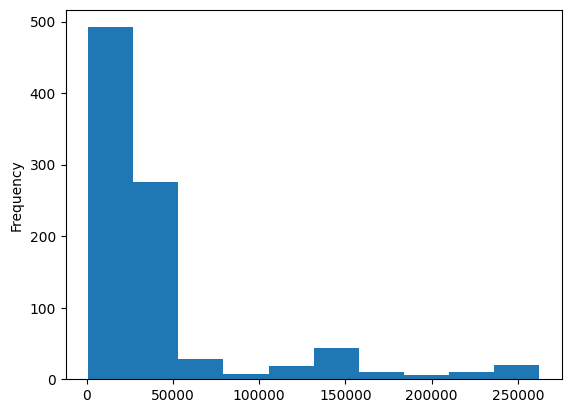

In [29]:
_ = madrid_pop["num_people"].plot.hist()

> **Assigning to `_`**
>
> `pandas` returns an object with the drawing from its plotting methods.
> Since you are in Jupyter environment, and you don’t need to work
> further with that object; you can assign it to `_`, a convention for
> an unused variable.

However, the default `pandas` plots can be a bit dull. A better option
is to use another package, called
[`seaborn`](https://seaborn.pydata.org).


In [30]:
import seaborn as sns

> **Why `sns`?**
>
> `seaborn` is, by convention, imported as `sns`. That came as a joke
> after [Samuel Normal
> Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), a fictional
> character The West Wing show.

The same plot using `seaborn` has a more pleasant default style and more
customisability.


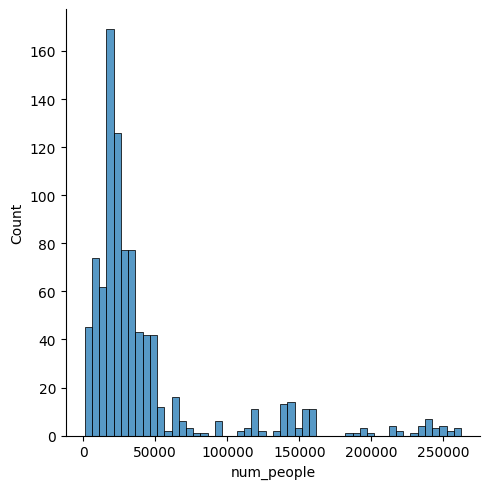

In [31]:
sns.displot(madrid_pop["num_people"])

Note you are using `sns` instead of `pd`, as the function belongs to
`seaborn` instead of `pandas`.

You can quickly see most of the areas have seen somewhere between 0 and
50K people; and very few have more than 200K. However, remember that in this case we are visualizing all years together, which could lead to missinterpretations.


### Line and bar plots

Another very common way of visually displaying a variable is with a line
or a bar chart. For example, if you want to generate a line plot of the
(sorted) total population per year:


<Axes: xlabel='year'>

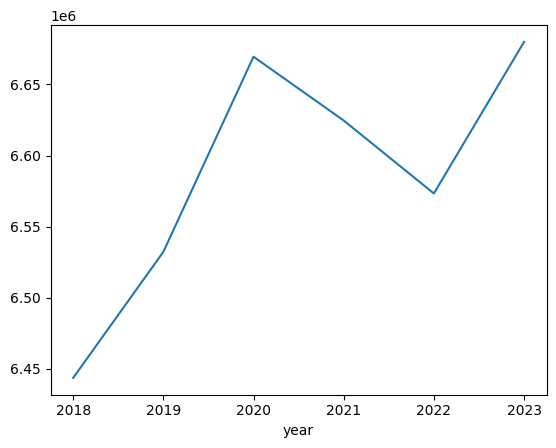

In [32]:
total_people_per_year = madrid_pop.groupby("year")["num_people"].sum()
total_people_per_year.plot()

What is evident is the impact of COVID on the total population. But understanding that the data is reported on the 1st of January of each year is crucial to understand why you see the offset on the dates.

For a bar plot all you need to do is to change from `plot` to
`plot.bar`:


<Axes: xlabel='year'>

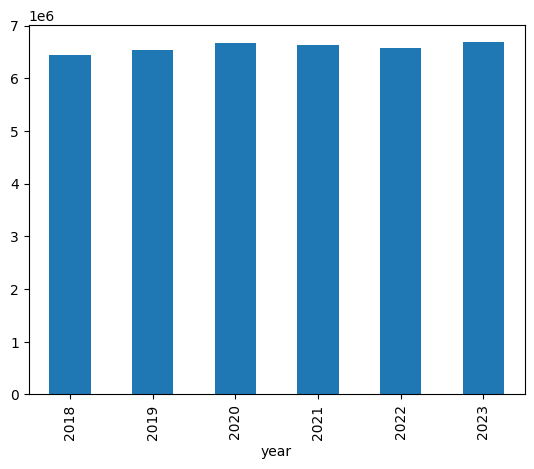

In [33]:
total_people_per_year.plot.bar()

Let's try to plot the `ratio_women` per neighbourhood, to see if we spot anything in particular.


<Axes: xlabel='year', ylabel='ratio_women'>

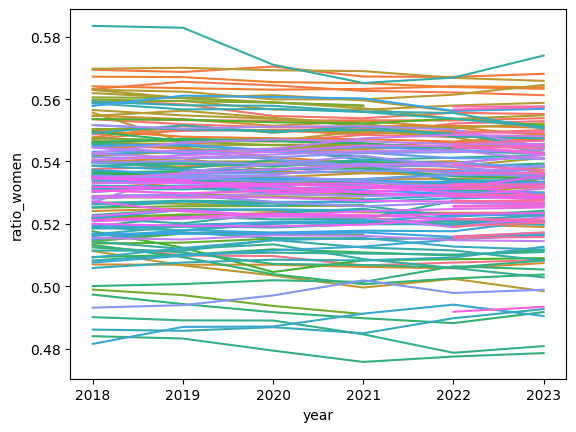

In [34]:
sns.lineplot(
    x="year",
    y="ratio_women",
    hue="neighbourhood",
    data=madrid_pop.sort_values("year", ascending=True),
    legend=False,
)

We can see some outliers, but the reality is that the data is hard to read so we probably would need some further analysis and visual considerations to efficiently communicate any possible trend.

> **One line or multiple lines?**
>
> You may have noticed that in some cases, the code is on a single line,
> but longer code is split into multiple lines. Python requires you to
> follow the [indentation rules](https://peps.python.org/pep-0008/), but
> apart from that, there are not a lot of other limits.

## Tidy data

> **Clean vs. Tidy**
>
> This section is a bit more advanced and hence considered optional.
> Feel free to skip it, move to the next, and return later when you feel
> more confident.

Once you can read your data in, explore specific cases, and have a first
visual approach to the entire set, the next step can be preparing it for
more sophisticated analysis. Maybe you are thinking of modeling it
through regression, or on creating subgroups in the dataset with
particular characteristics, or maybe you simply need to present summary
measures that relate to a slightly different arrangement of the data
than you have been presented with.

For all these cases, you first need what statistician, and general R
wizard, Hadley Wickham calls _“tidy data”_. The general idea to “tidy”
your data is to convert them from whatever structure they were handed in
to you into one that allows convenient and standardized manipulation,
and that supports directly inputting the data into what he calls
“_tidy_” analysis tools. But, at a more practical level, what is exactly
_“tidy data”_? In Wickham’s own words:

> _Tidy data is a standard way of mapping the meaning of a dataset to
> its structure. A dataset is messy or tidy depending on how rows,
> columns and tables are matched up with observations, variables and
> types._

He then goes on to list the three fundamental characteristics of _“tidy
data”_:

1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.

If you are further interested in the concept of _“tidy data”_, I
recommend you check out the [original
paper](http://www.jstatsoft.org/v59/i10/) (open access) and the [public
repository](https://github.com/hadley/tidy-data) associated with it.


## Grouping, transforming, aggregating

One of the advantage of tidy datasets is they allow to perform advanced
transformations in a more direct way. One of the most common ones is
what is called “group-by” operations. Originated in the world of
databases, these operations allow you to group observations in a table
by one of its labels, index, or category, and apply operations on the
data group by group.

For example, given our dataframe, you might want to
compute the total sum of the population by each district. This task can
be split into two different ones:

- Group the table in each of the different districts.
- Compute the sum of `num_people` for each of them.

To do this in `pandas`, meet one of its workhorses, and also one of the
reasons why the library has become so popular: the `groupby` operator.


In [35]:
mad_grouped = madrid_pop.groupby("year")
mad_grouped

The object `mad_grouped` still hasn’t computed anything. It is only a
convenient way of specifying the grouping. But this allows us then to
perform a multitude of operations on it. For our example, the sum is
calculated as follows:


In [36]:
mad_grouped.sum(numeric_only=True)

,code_municipality,num_people,num_people_men,num_people_women,ratio_women
year,,,,,
2018,4268008,6443648,3000680,3442968,81.100391
2019,4268008,6532252,3042356,3489896,81.108315
2020,4268008,6669460,3109464,3559996,81.047788
2021,4268008,6624620,3090314,3534306,81.013452
2022,4268008,6573324,3069648,3503676,80.939052
2023,4268008,6679862,3119732,3560130,80.94286


Similarly, you can also obtain a summary of each group:


In [37]:
mad_grouped.describe()

code_municipality                                                    \
                 count     mean  std      min      25%      50%      75%   
year                                                                       
2018             152.0  28079.0  0.0  28079.0  28079.0  28079.0  28079.0   
2019             152.0  28079.0  0.0  28079.0  28079.0  28079.0  28079.0   
2020             152.0  28079.0  0.0  28079.0  28079.0  28079.0  28079.0   
2021             152.0  28079.0  0.0  28079.0  28079.0  28079.0  28079.0   
2022             152.0  28079.0  0.0  28079.0  28079.0  28079.0  28079.0   
2023             152.0  28079.0  0.0  28079.0  28079.0  28079.0  28079.0   

              num_people                ... num_people_women            \
          max      count          mean  ...              75%       max   
year                                    ...                              
2018  28079.0      152.0  42392.421053  ...         21771.75  132695.0   
2019  28079.0      152.0  42975.342105  ...          21987.0  135238.0   
2020  28079.0      152.0  43878.026316  ...         22623.75  138879.0   
2021  28079.0      152.0  43583.026316  ...         22530.75  138033.0   
2022  28079.0      152.0  43245.552632  ...          22296.5  136133.0   
2023  28079.0      152.0  43946.460526  ...         22742.75  139707.0   

     ratio_women                                                              \
           count      mean       std       min       25%       50%       75%   
year                                                                           
2018       152.0  0.533555   0.01839  0.481481  0.521591  0.534767   0.54588   
2019       152.0  0.533607  0.018198  0.483197  0.522356  0.534355   0.54565   
2020       152.0  0.533209  0.017944  0.479319  0.522586  0.533905  0.545599   
2021       152.0  0.532983  0.017984  0.475698  0.522263  0.533724  0.545682   
2022       152.0  0.532494  0.017716  0.477414  0.521691  0.533305   0.54492   
2023       152.0  0.532519  0.017486   0.47853  0.522637  0.533363  0.544488   

                
           max  
year            
2018  0.583492  
2019  0.582908  
2020  0.571061  
2021  0.568987  
2022   0.56714  
2023  0.573983  

[6 rows x 40 columns]

You will not get into it today as it goes beyond the basics this chapter
wants to cover, but keep in mind that `groupby` allows you to not only
call generic functions (like `sum` or `describe`), but also your own
functions. This opens the door for virtually any kind of transformation
and aggregation possible.

> **Additional reading**
>
> - A good introduction to data manipulation in Python is Wes
>   McKinney’s “[Python for Data
>   Analysis](https://wesmckinney.com/book/pandas-basics)”
>   \[@mckinney2012python\].
> - To explore further some of the visualization capabilities in at
>   your fingertips, the Python library `seaborn` is an excellent
>   choice. Its online
>   [tutorial](https://seaborn.pydata.org/tutorial.html) is a
>   fantastic place to start.
> - A good extension is Hadley Wickham’s “Tidy data” paper
>   \[@wickham2014tidy\], which presents a very popular way of
>   organising tabular data for efficient manipulation.

## Acknowledgements

This section is derived from _SDS_ by [@martinfleis](https://github.com/martinfleis/sds) which in turn is based on _A Course on Geographic Data Science_ by
@darribas_gds_course, both licensed under CC-BY-SA 4.0. The text was slightly
adapted, mostly to accommodate a different dataset used.
